In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_excel('/content/sample_data/Health Monitor Dataset.xlsx')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4286 entries, 0 to 4285
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Dehydration                   4286 non-null   bool   
 1   Medicine Overdose             4286 non-null   bool   
 2   Acidious                      4286 non-null   bool   
 3   Cold                          4286 non-null   bool   
 4   Cough                         4286 non-null   bool   
 5   Dehydration.1                 4286 non-null   int64  
 6   Medicine Overdose.1           4286 non-null   int64  
 7   Acidious.1                    4286 non-null   int64  
 8   Cold .1                       4286 non-null   int64  
 9   Cough.1                       4286 non-null   int64  
 10  Type                          4286 non-null   int64  
 11  Temperature                   4286 non-null   int64  
 12  Heart Rate                    4286 non-null   int64  
 13  Pul

In [ ]:
df.columns=df.columns.str.replace(' ','_')

In [ ]:
df.columns=df.columns.str.lower()

In [ ]:
newdf=df.drop(['dehydration.1', 'medicine_overdose.1', 'acidious.1', 'cold_.1','cough.1'], axis=1)
newdf.head()
# df.head()

,dehydration,medicine_overdose,acidious,cold_,cough,type,temperature,heart_rate,pulse,bpsys,bpdia,respiratory_rate,oxygen_saturation,ph,causes_respiratory_imbalance
0,True,False,False,False,False,1,98,93,67,90,74,12,0.994164,8,Mild
1,False,False,True,False,True,2,98,185,160,100,74,47,0.913976,13,Severe
2,False,True,True,False,True,3,103,126,194,97,47,42,0.932465,10,Chronic
3,True,False,False,False,False,1,98,92,69,91,60,16,0.999605,8,Mild
4,True,True,True,False,True,4,105,197,115,106,87,39,0.971081,13,Chronic


In [ ]:
# newdf = newdf.drop(['type'],axis=1)
newdf.head()

,dehydration,medicine_overdose,acidious,cold_,cough,type,temperature,heart_rate,pulse,bpsys,bpdia,respiratory_rate,oxygen_saturation,ph,causes_respiratory_imbalance
0,True,False,False,False,False,1,98,93,67,90,74,12,0.994164,8,Mild
1,False,False,True,False,True,2,98,185,160,100,74,47,0.913976,13,Severe
2,False,True,True,False,True,3,103,126,194,97,47,42,0.932465,10,Chronic
3,True,False,False,False,False,1,98,92,69,91,60,16,0.999605,8,Mild
4,True,True,True,False,True,4,105,197,115,106,87,39,0.971081,13,Chronic


In [ ]:
# prompt: replace all the values in df like True and False

newdf = newdf.replace({True: 1, False: 0})
newdf.head()


,dehydration,medicine_overdose,acidious,cold_,cough,type,temperature,heart_rate,pulse,bpsys,bpdia,respiratory_rate,oxygen_saturation,ph,causes_respiratory_imbalance
0,1,0,0,0,0,1,98,93,67,90,74,12,0.994164,8,Mild
1,0,0,1,0,1,2,98,185,160,100,74,47,0.913976,13,Severe
2,0,1,1,0,1,3,103,126,194,97,47,42,0.932465,10,Chronic
3,1,0,0,0,0,1,98,92,69,91,60,16,0.999605,8,Mild
4,1,1,1,0,1,4,105,197,115,106,87,39,0.971081,13,Chronic


In [ ]:
newdf.columns

Index(['dehydration', 'medicine_overdose', 'acidious', 'cold_', 'cough',
       'type', 'temperature', 'heart_rate', 'pulse', 'bpsys', 'bpdia',
       'respiratory_rate', 'oxygen_saturation', 'ph',
       'causes_respiratory_imbalance'],
      dtype='object')

In [ ]:
newdf.describe()

,dehydration,medicine_overdose,acidious,cold_,cough,type,temperature,heart_rate,pulse,bpsys,bpdia,respiratory_rate,oxygen_saturation,ph
count,4286.000000,4286.000000,4286.000000,4286.000000,4286.00000,4286.000000,4286.000000,4286.000000,4286.000000,4286.000000,4286.000000,4286.000000,4286.000000,4286.000000
mean,0.489267,0.500233,0.491834,0.478768,0.50280,2.462902,100.167989,115.208586,113.360243,101.327345,69.566496,28.911573,0.950482,7.534764
std,0.499943,0.500058,0.499992,0.499607,0.50005,1.120677,3.203449,43.326482,46.123845,5.379024,16.165556,16.211535,0.030227,3.608829
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,95.000000,50.000000,50.000000,90.000000,40.000000,6.000000,0.900010,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,2.000000,98.000000,77.000000,67.000000,97.000000,58.000000,14.000000,0.924190,5.000000
50%,0.000000,1.000000,0.000000,0.000000,1.00000,2.000000,99.000000,106.000000,108.000000,101.000000,69.000000,25.500000,0.949038,8.000000
75%,1.000000,1.000000,1.000000,1.000000,1.00000,3.000000,103.000000,152.000000,155.000000,104.000000,81.000000,43.000000,0.974621,10.000000
max,1.000000,1.000000,1.000000,1.000000,1.00000,5.000000,106.000000,200.000000,200.000000,120.000000,100.000000,60.000000,0.999997,14.000000


In [ ]:
newdf.isnull().sum()

,0
dehydration,0
medicine_overdose,0
acidious,0
cold_,0
cough,0
type,0
temperature,0
heart_rate,0
pulse,0
bpsys,0


In [ ]:
target=newdf['causes_respiratory_imbalance']
feature = newdf.drop(['causes_respiratory_imbalance','type'],axis=1)

In [ ]:
target.head()

,causes_respiratory_imbalance
0,Mild
1,Severe
2,Chronic
3,Mild
4,Chronic


In [ ]:
target = target.replace({'Mild': 0, "Chronic": 1, "Severe": 2, 'Normal': 0})

<Axes: >

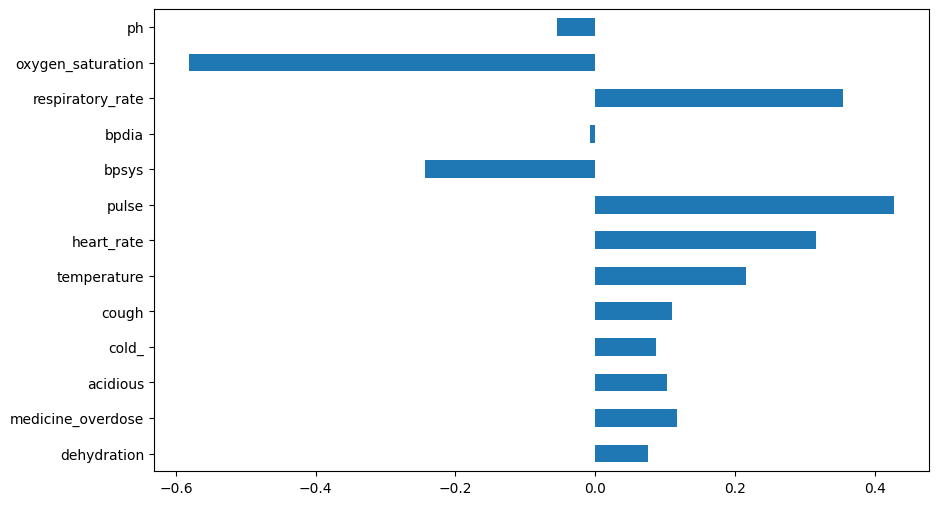

In [ ]:
feature.corrwith(target).plot.barh(figsize=(10,6))

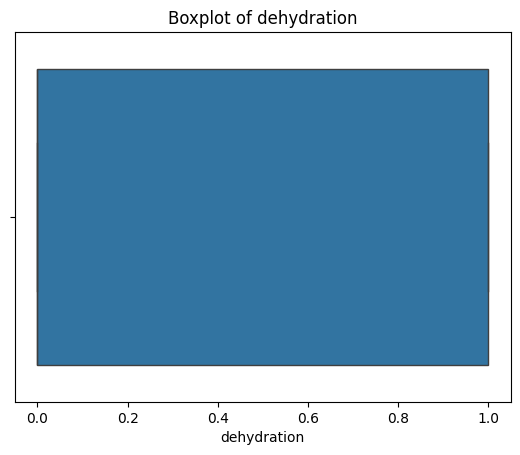

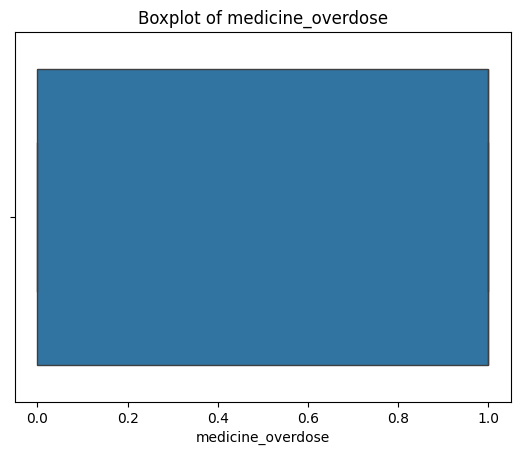

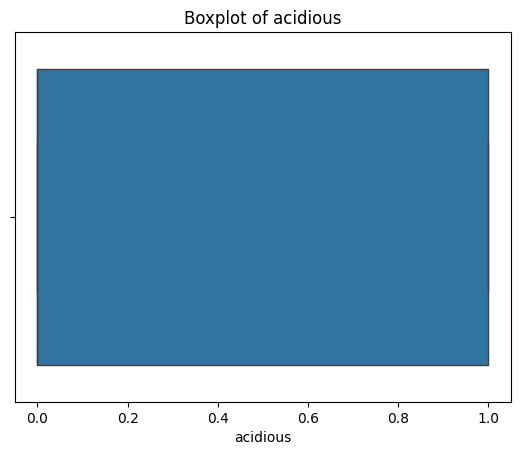

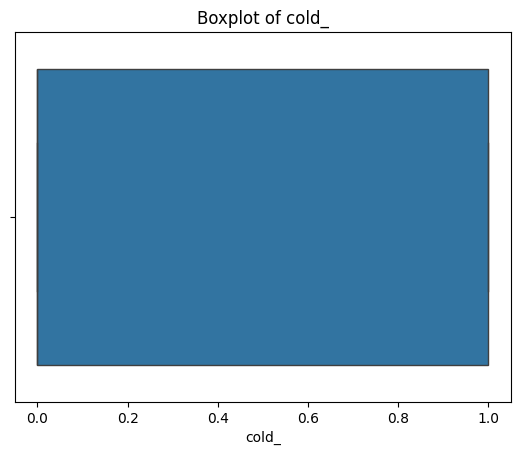

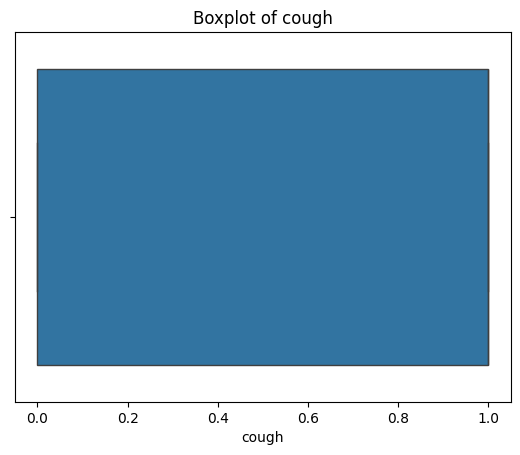

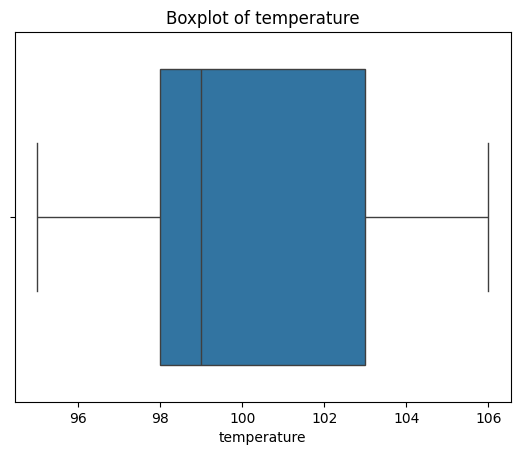

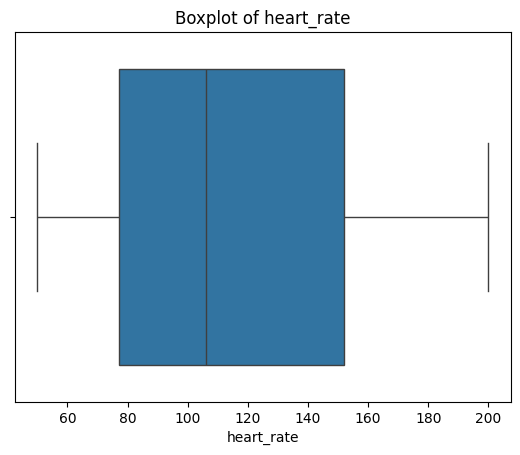

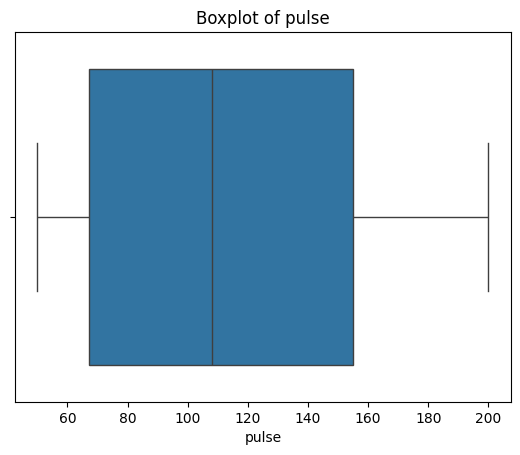

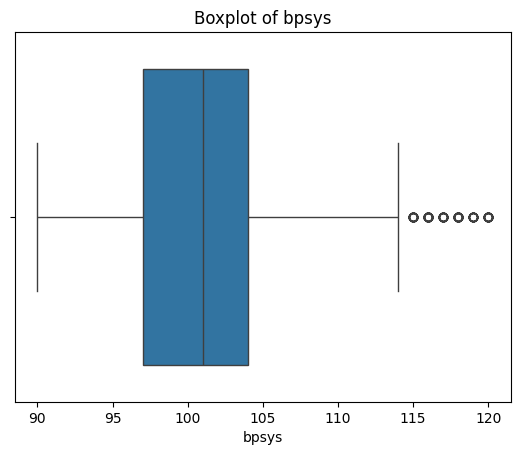

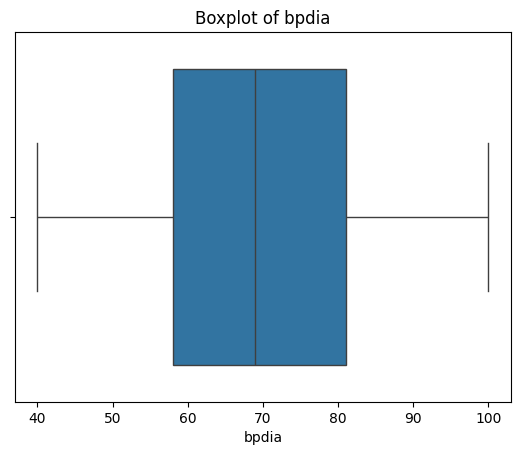

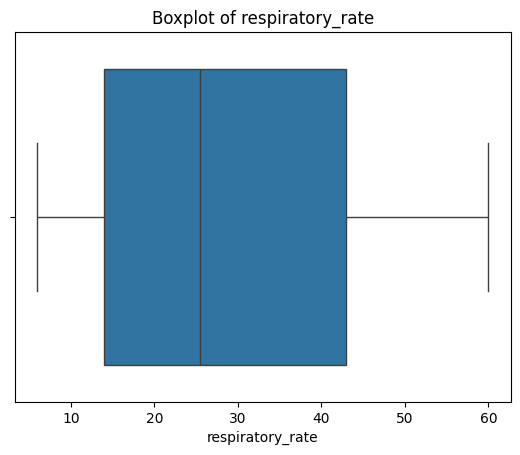

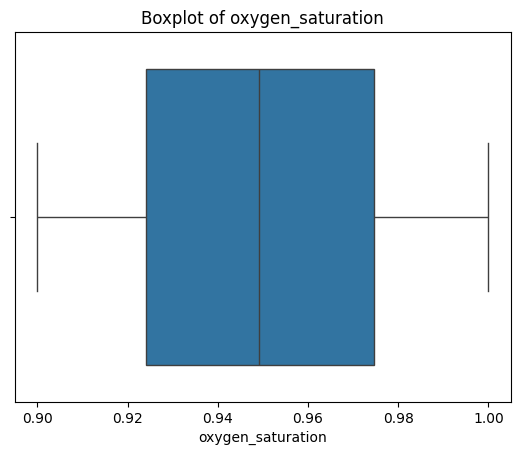

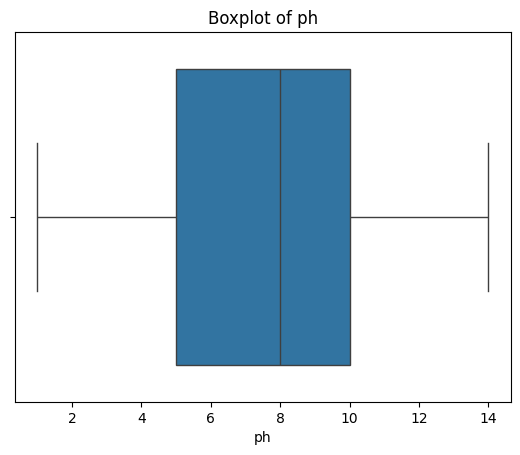

In [ ]:
for col in feature.columns:
    plt.figure()  # Create a new figure for each boxplot
    sns.boxplot(x=feature[col])
    plt.title(f"Boxplot of {col}")  # Set a title for each plot
    plt.show()

<Axes: ylabel='bpsys'>

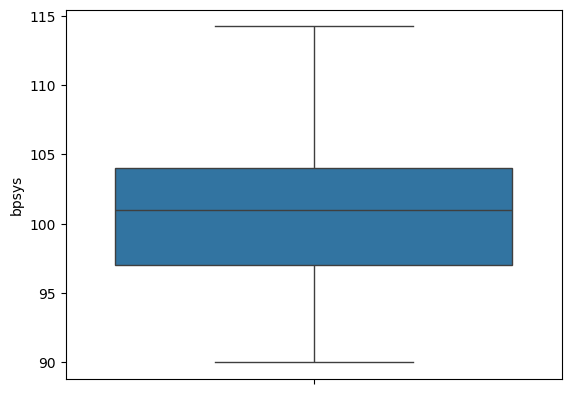

In [ ]:
Q1 = newdf['bpsys'].quantile(0.05)
Q3 = newdf['bpsys'].quantile(0.6270)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
newdf['bpsys'] = newdf['bpsys'].clip(lower_bound, upper_bound)
sns.boxplot(y=newdf['bpsys'])


<Axes: >

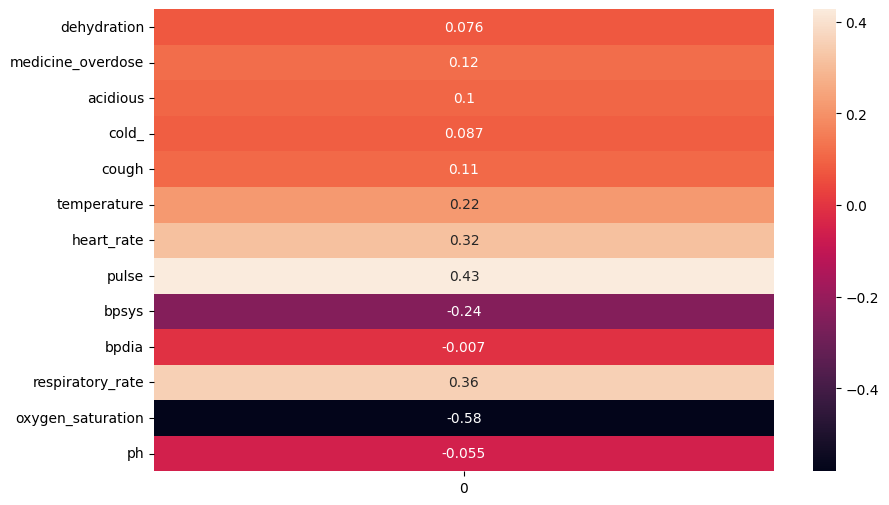

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(feature.corrwith(target).to_frame(), annot=True)

<Axes: >

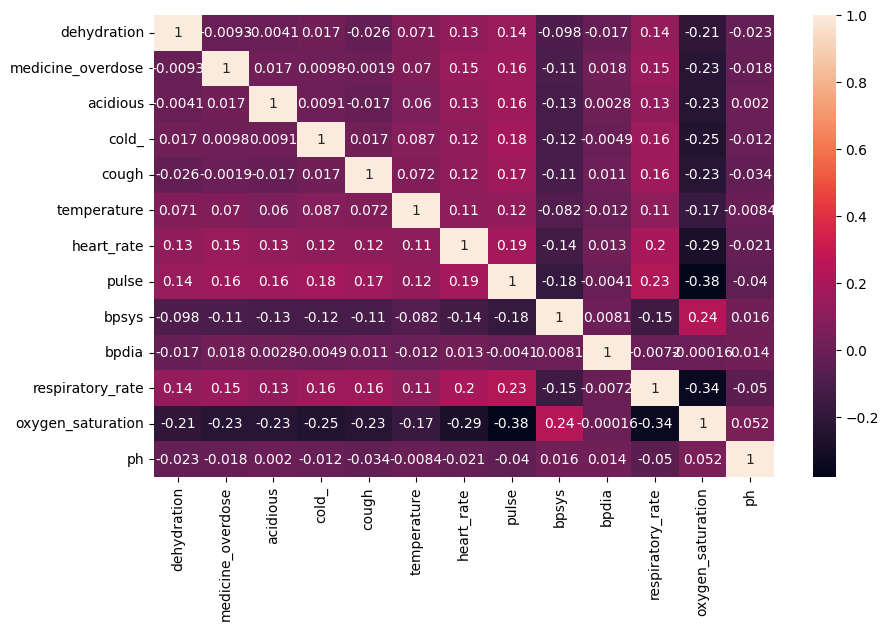

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(feature.corr(), annot=True)

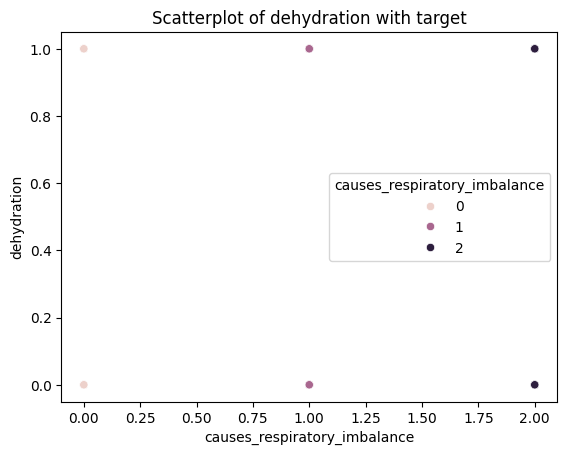

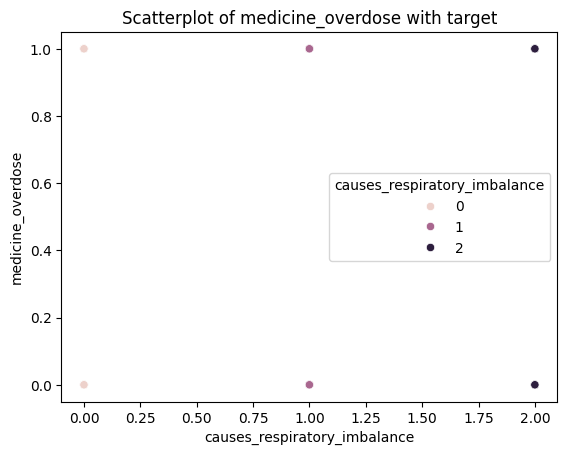

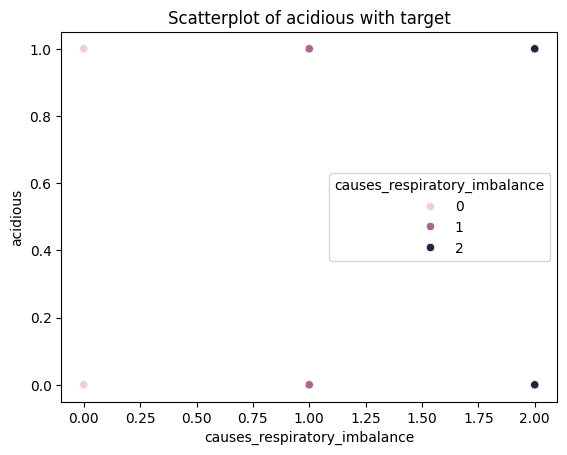

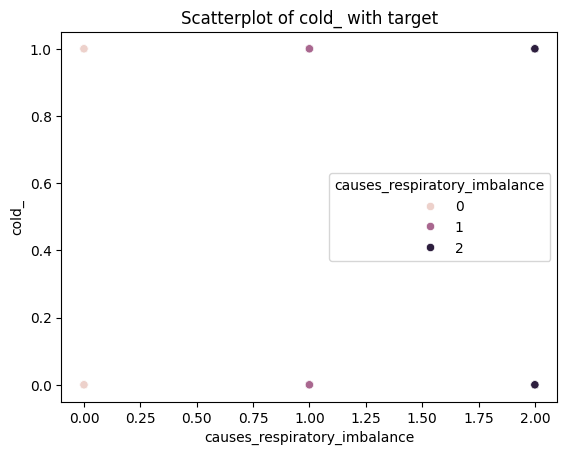

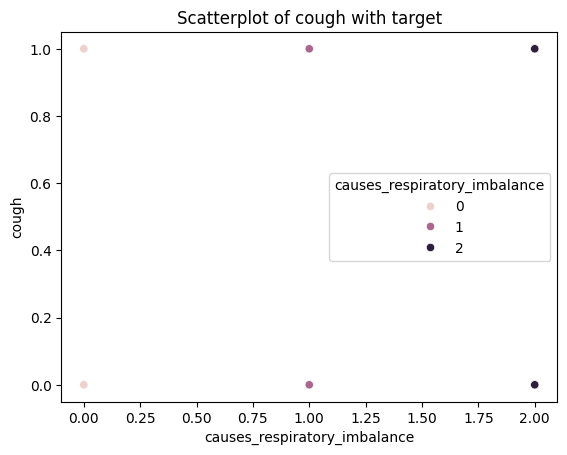

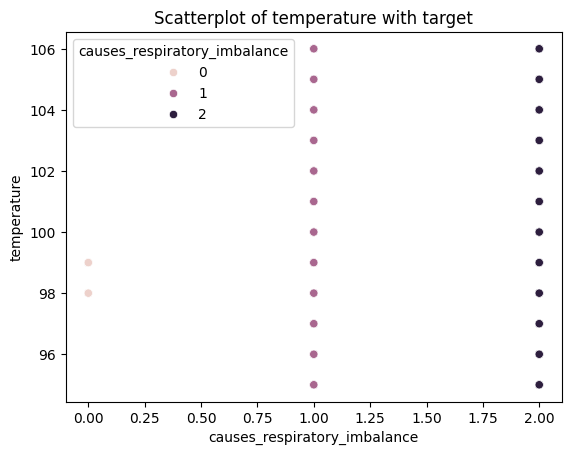

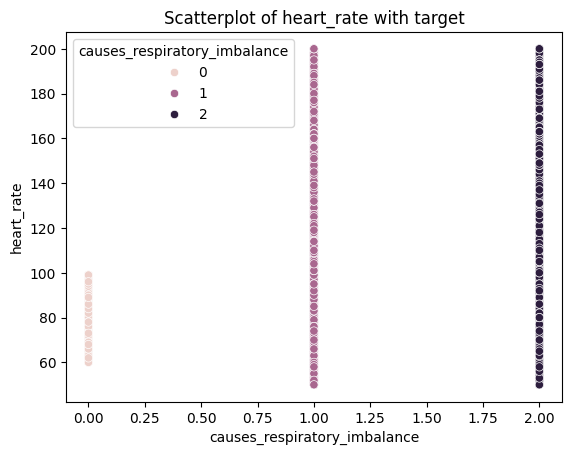

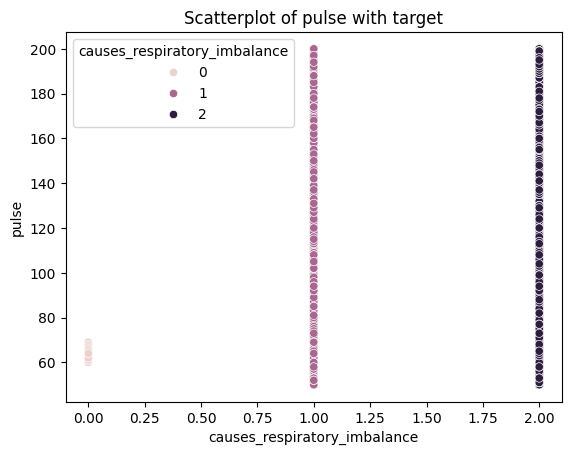

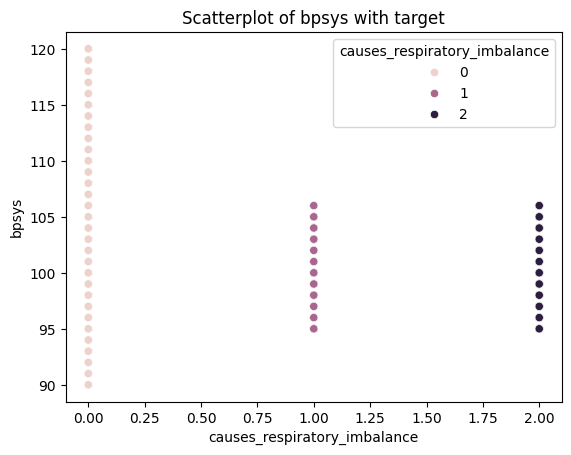

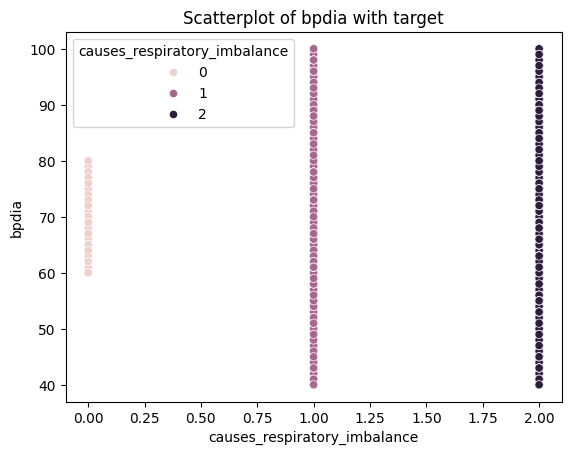

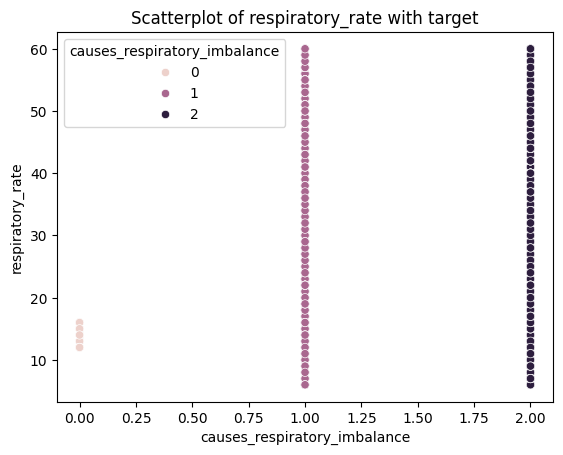

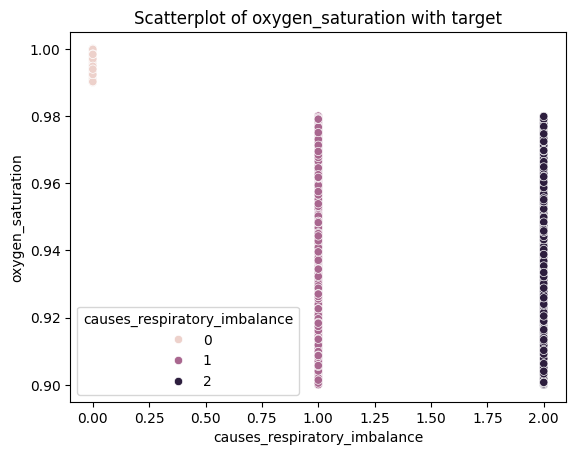

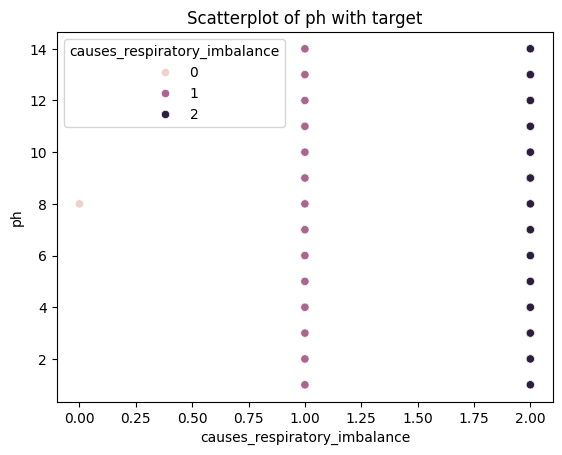

In [ ]:
# prompt: write a code to scatterplot with the target wirh feature columns

import matplotlib.pyplot as plt
for col in feature.columns:
  plt.figure()
  sns.scatterplot(y=feature[col],x=target,hue=target)
  plt.title(f"Scatterplot of {col} with target")
  plt.show()


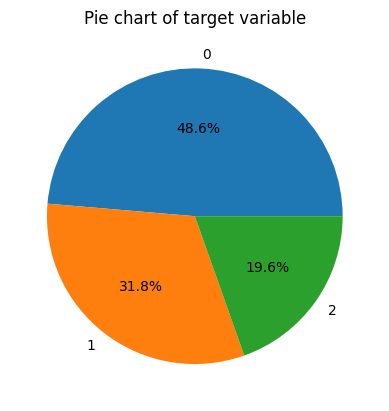

In [ ]:
# prompt: generate a pie chart on target

import matplotlib.pyplot as plt
plt.figure()
plt.pie(target.value_counts(),labels=[0,1,2],autopct='%1.1f%%')
plt.title("Pie chart of target variable")
plt.show()


In [ ]:
# prompt: use minmaxscaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
feature = scaler.fit_transform(feature)



In [ ]:
# !pip uninstall tensorflow keras
# !pip install tensorflow==2.12.0
# !pip install keras==2.12.0

Found existing installation: tensorflow 2.12.0
Uninstalling tensorflow-2.12.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.12.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? N
Found existing installation: keras 2.12.0
Uninstalling keras-2.12.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/keras-2.12.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/keras/*
Proceed (Y/n)? N


In [ ]:
# prompt: followup train a classification model increase the accuracy by hypertuning the without over fit
feature=feature[1:]
target=target[1:]
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)

# Create and train the model
model = LogisticRegression(max_iter=180, C=1.0, penalty='l2', solver='lbfgs')  # Example hyperparameters
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


# # Hyperparameter tuning example (using GridSearchCV)
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'C': [0.1, 1, 10],
#     'penalty': ['l1', 'l2'],
#     'solver': ['liblinear', 'saga']
# }

# grid_search = GridSearchCV(model, param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# best_model = grid_search.best_estimator_
# best_params = grid_search.best_params_

# y_pred_tuned = best_model.predict(X_test)
# accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
# print(f"Tuned Accuracy: {accuracy_tuned}")
# print(f"Best Hyperparameters: {best_params}")


Accuracy: 0.9626168224299065


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y2= model.predict([[1, 1, 1, 0, 1, 39.5, 105, 85, 145, 95, 24, 92.5, 7.32]])
print(y2)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
# prompt: save the model upper

import pickle

filename = 'trained_model3.sav'
pickle.dump(model, open(filename, 'wb'))


In [ ]:
# prompt: import a xlsx file as df

import pandas as pd
df = pd.read_excel('/content/synthetic_dataset (1).xlsx')


In [ ]:
df.columns=df.columns.str.replace(' ','_')

In [ ]:
# prompt: drop type column

df = df.drop('type', axis=1)


In [ ]:
newdf = newdf.replace({True: 1, False: 0})
newdf.head()

,dehydration,medicine_overdose,acidious,cold_,cough,type,temperature,heart_rate,pulse,bpsys,bpdia,respiratory_rate,oxygen_saturation,ph,causes_respiratory_imbalance
0,1,0,0,0,0,1,98,93,67,90.0,74,12,0.994164,8,Mild
1,0,0,1,0,1,2,98,185,160,100.0,74,47,0.913976,13,Severe
2,0,1,1,0,1,3,103,126,194,97.0,47,42,0.932465,10,Chronic
3,1,0,0,0,0,1,98,92,69,91.0,60,16,0.999605,8,Mild
4,1,1,1,0,1,4,105,197,115,106.0,87,39,0.971081,13,Chronic


In [ ]:
target=newdf['causes_respiratory_imbalance']
feature = newdf.drop(['causes_respiratory_imbalance','type'],axis=1)

In [ ]:
target = target.replace({'Mild': 0, "Chronic": 1, "Severe": 2, 'Normal': 0})

In [ ]:
# prompt: /content/trained_model.sav import it and get the accuracy from target and feature

loaded_model = pickle.load(open('/content/trained_model2.sav', 'rb'))
# result = loaded_model.score(feature[1:], target[1:])
result = loaded_model.predict([[1, 1, 1, 0, 1, 39.5, 105, 85, 145, 95, 24, 92.5, 7.32]])

print(result)


[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
